# Tensorflow Tutorial

In menu **Runtime**, chose **change runtime type**, in **Hardware accelerator** choose **GPU**

In [0]:
!pip install -U tensorflow-gpu tensorboard

Requirement already up-to-date: tensorflow-gpu in /usr/local/lib/python3.6/dist-packages (2.0.0)
Requirement already up-to-date: tensorboard in /usr/local/lib/python3.6/dist-packages (2.0.1)


## Multiple layer Perceptron

In [0]:
import tensorflow as tf
import numpy as np

Load and prepare the [MNIST dataset](http://yann.lecun.com/exdb/mnist/). Convert the samples from integers to floating-point numbers:

In [0]:
# load data

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [0]:
print(f"x type: {type(x_train)}")
print(f"x dtype: {x_train.dtype}")
print(f"y type: {type(y_train)}")
print(f"x shape: {np.shape(x_train)}")
print(f"y shape: {np.shape(y_train)}")
print(f"y unique: {np.unique(y_train)}")

x type: <class 'numpy.ndarray'>
x dtype: uint8
y type: <class 'numpy.ndarray'>
x shape: (60000, 28, 28)
y shape: (60000,)
y unique: [0 1 2 3 4 5 6 7 8 9]


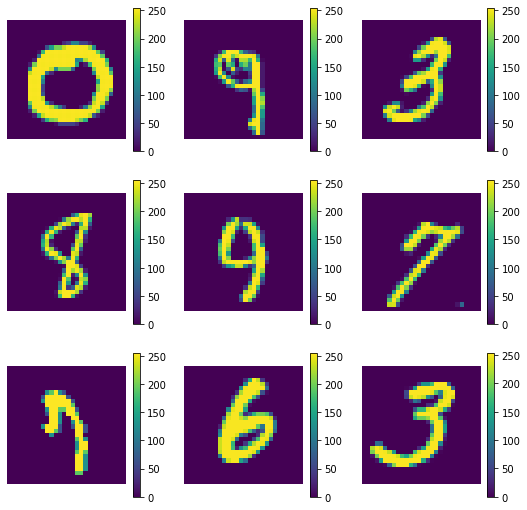

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import random

fig = plt.figure(figsize=(9,9))
# randomly show 9 images from x_train
for i in range(9):
    ax = fig.add_subplot(3,3,i+1)
    img = x_train[random.randint(0,60000)]
    plt.imshow(img)
    plt.colorbar()
    plt.grid(False)
    plt.axis('off')


In [0]:
# normalize images
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)
x_train, x_test = x_train / 255.0, x_test / 255.0

Build the tf.keras.Sequential model by stacking layers. Choose an optimizer and loss function for training:

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),  # flatten image as 1-D array
  tf.keras.layers.Dense(128, activation='relu'),  # fully-connected layer
  tf.keras.layers.Dropout(0.2),                   # dropout to avoid overfitting
  tf.keras.layers.Dense(10, activation='softmax') # output layer with 10 classes
])

model.compile(optimizer='adam',                   
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
# training
model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 114us/sample - loss: 0.2956 - accuracy: 0.9139
Epoch 2/5
60000/60000 [==============================] - 6s 103us/sample - loss: 0.1441 - accuracy: 0.9575
Epoch 3/5
60000/60000 [==============================] - 6s 103us/sample - loss: 0.1049 - accuracy: 0.9687
Epoch 4/5
60000/60000 [==============================] - 6s 102us/sample - loss: 0.0892 - accuracy: 0.9725
Epoch 5/5
60000/60000 [==============================] - 6s 103us/sample - loss: 0.0756 - accuracy: 0.9766


In [0]:
# evaluate
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print(f"test_loss: {test_loss}, test_accuracy: {test_acc}")

10000/1 - 1s - loss: 0.0395 - accuracy: 0.9755
test_loss: 0.07755967707363888, test_accuracy: 0.9754999876022339


The image classifier is now trained to ~98% accuracy on this dataset.

## Convolutional Neural Networks (CNN)

In [0]:
# load dataset

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()


# normalize images
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)
x_train, x_test = x_train / 255.0, x_test / 255.0


In [0]:

# Reshaping the array to 4-dims so that it can work with the tf.keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# width x height x channel
input_shape = (28, 28, 1)

In [0]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()

model.add(Conv2D(8, kernel_size=(3,3), input_shape=input_shape))   # 8 filters
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(16, kernel_size=(3,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

#model.add(Conv2D(64, kernel_size=(3,3)))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.2))

model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

In [0]:
model.compile(optimizer='adam',                   
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 8)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)              

In [0]:
# training

epochs = 10
history = model.fit(x_train, y_train, epochs=epochs)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 172us/sample - loss: 0.3011 - accuracy: 0.9069
Epoch 2/10
60000/60000 [==============================] - 9s 153us/sample - loss: 0.1160 - accuracy: 0.9639
Epoch 3/10
60000/60000 [==============================] - 9s 154us/sample - loss: 0.0889 - accuracy: 0.9724
Epoch 4/10
60000/60000 [==============================] - 9s 154us/sample - loss: 0.0754 - accuracy: 0.9766
Epoch 5/10
60000/60000 [==============================] - 9s 153us/sample - loss: 0.0692 - accuracy: 0.9785
Epoch 6/10
60000/60000 [==============================] - 9s 154us/sample - loss: 0.0638 - accuracy: 0.9792
Epoch 7/10
60000/60000 [==============================] - 9s 154us/sample - loss: 0.0558 - accuracy: 0.9825
Epoch 8/10
60000/60000 [==============================] - 9s 153us/sample - loss: 0.0537 - accuracy: 0.9830
Epoch 9/10
60000/60000 [==============================] - 9s 153us/sample - loss: 0.0519 - accuracy: 0.9832
Epoc

In [0]:
# evaluate
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print(f"test_loss: {test_loss}, test_accuracy: {test_acc}")

10000/1 - 1s - loss: 0.0163 - accuracy: 0.9907
test_loss: 0.032507007854412226, test_accuracy: 0.9907000064849854


## Long short term memory (LSTM)


The IMDB large movie review dataset is a *binary classification* dataset—all the reviews have either a *positive* or *negative* sentiment.

Download the dataset using [TFDS](https://www.tensorflow.org/datasets).


In [0]:
from tensorflow import keras

import tensorflow_datasets as tfds
tfds.disable_progress_bar()

import numpy as np

print(tf.__version__)

2.0.0


In [0]:

(train_data, test_data), info = tfds.load(
    # Use the version pre-encoded with an ~8k vocabulary.
    'imdb_reviews/subwords8k', 
    # Return the train/test datasets as a tuple.
    split = (tfds.Split.TRAIN, tfds.Split.TEST),
    # Return (example, label) pairs from the dataset (instead of a dictionary).
    as_supervised=True,
    # Also return the `info` structure. 
    with_info=True)

The dataset info includes the encoder (a tfds.features.text.SubwordTextEncoder).

In [0]:
encoder = info.features['text'].encoder

print ('Vocabulary size: {}'.format(encoder.vocab_size))

Vocabulary size: 8185


This text encoder will reversibly encode any string, falling back to byte-encoding if necessary.

In [0]:
sample_string = 'Hello TensorFlow.'

encoded_string = encoder.encode(sample_string)
print ('Encoded string is {}'.format(encoded_string))

original_string = encoder.decode(encoded_string)
print ('The original string: "{}"'.format(original_string))

assert original_string == sample_string

Encoded string is [4025, 222, 6307, 2327, 4043, 2120, 7975]
The original string: "Hello TensorFlow."


The encoder encodes the string by breaking it into subwords or characters if the word is not in its dictionary. So the more a string resembles the dataset, the shorter the encoded representation will be.

In [0]:
for index in encoded_string:
  print ('{} ----> {}'.format(index, encoder.decode([index])))

4025 ----> Hell
222 ----> o 
6307 ----> Ten
2327 ----> sor
4043 ----> Fl
2120 ----> ow
7975 ----> .


Let's take a moment to understand the format of the data. The dataset comes preprocessed: each example is an array of integers representing the words of the movie review.

The text of reviews have been converted to integers, where each integer represents a specific word-piece in the dictionary.

Each label is an integer value of either 0 or 1, where 0 is a negative review, and 1 is a positive review.

Here's what the first review looks like:

In [0]:
for train_example, train_label in train_data.take(1):
  print('Encoded text:', train_example[:10].numpy())
  print('Label:', train_label.numpy())

Encoded text: [ 249    4  277  309  560    6 6639 4574    2   12]
Label: 1


The info structure contains the encoder/decoder. The encoder can be used to recover the original text:

In [0]:
encoder.decode(train_example)

"As a lifelong fan of Dickens, I have invariably been disappointed by adaptations of his novels.<br /><br />Although his works presented an extremely accurate re-telling of human life at every level in Victorian Britain, throughout them all was a pervasive thread of humour that could be both playful or sarcastic as the narrative dictated. In a way, he was a literary caricaturist and cartoonist. He could be serious and hilarious in the same sentence. He pricked pride, lampooned arrogance, celebrated modesty, and empathised with loneliness and poverty. It may be a cliché, but he was a people's writer.<br /><br />And it is the comedy that is so often missing from his interpretations. At the time of writing, Oliver Twist is being dramatised in serial form on BBC television. All of the misery and cruelty is their, but non of the humour, irony, and savage lampoonery. The result is just a dark, dismal experience: the story penned by a journalist rather than a novelist. It's not really Dickens

You will want to create batches of training data for your model. The reviews are all different lengths, so use padded_batch to zero pad the sequences while batching:

In [0]:
BUFFER_SIZE = 1000
BATCH_SIZE = 64

train_batches = (
    train_data
    .shuffle(BUFFER_SIZE)
    .padded_batch(BATCH_SIZE, train_data.output_shapes))

test_batches = (
    test_data
    .padded_batch(BATCH_SIZE, train_data.output_shapes))

Each batch will have a shape of (batch_size, sequence_length) because the padding is dynaimic each batch will have a different langth:

In [0]:
for example_batch, label_batch in train_batches.take(2):
  print("Batch shape:", example_batch.shape)
  print("label shape:", label_batch.shape)

Batch shape: (64, 1547)
label shape: (64,)
Batch shape: (64, 1359)
label shape: (64,)


Build a tf.keras.Sequential model and start with an embedding layer. An embedding layer stores one vector per word. When called, it converts the sequences of word indices to sequences of vectors. These vectors are trainable. After training (on enough data), words with similar meanings often have similar vectors.

This index-lookup is much more efficient than the equivalent operation of passing a one-hot encoded vector through a tf.keras.layers.Dense layer.

A recurrent neural network (RNN) processes sequence input by iterating through the elements. RNNs pass the outputs from one timestep to their input—and then to the next.

The tf.keras.layers.Bidirectional wrapper can also be used with an RNN layer. This propagates the input forward and backwards through the RNN layer and then concatenates the output. This helps the RNN to learn long range dependencies.

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 32),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the Keras model to configure the training process:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          261920    
_________________________________________________________________
bidirectional (Bidirectional (None, None, 32)          6272      
_________________________________________________________________
bidirectional_1 (Bidirection (None, 32)                6272      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 275,553
Trainable params: 275,553
Non-trainable params: 0
________________________________________________

In [0]:
epochs = 5

history = model.fit(train_batches, epochs=epochs,
                    validation_data=test_batches, 
                    validation_steps=30)

Epoch 1/5
391/391 [==============================] - 243s 621ms/step - loss: 0.6868 - accuracy: 0.5570 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/5
391/391 [==============================] - 231s 590ms/step - loss: 0.4313 - accuracy: 0.8251 - val_loss: 0.3656 - val_accuracy: 0.8495
Epoch 3/5
391/391 [==============================] - 224s 572ms/step - loss: 0.3020 - accuracy: 0.8896 - val_loss: 0.3701 - val_accuracy: 0.8484
Epoch 4/5
391/391 [==============================] - 218s 556ms/step - loss: 0.2460 - accuracy: 0.9156 - val_loss: 0.3469 - val_accuracy: 0.8656
Epoch 5/5
391/391 [==============================] - 225s 575ms/step - loss: 0.2110 - accuracy: 0.9317 - val_loss: 0.3763 - val_accuracy: 0.8615


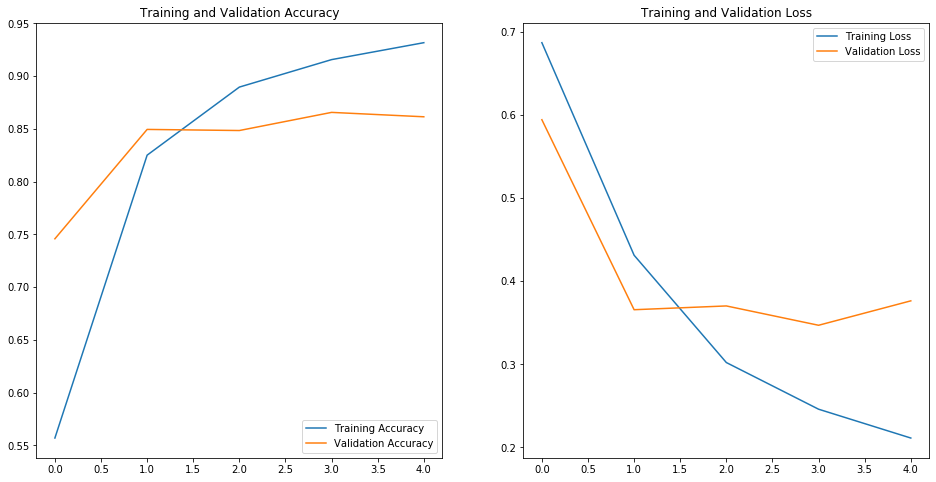

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [0]:
test_loss, test_acc = model.evaluate(test_batches)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

391/391 [==============================] - 92s 235ms/step - loss: 0.3898 - accuracy: 0.8574
Test Loss: 0.3898003193194909
Test Accuracy: 0.8573600053787231


In [0]:
sample_pred_text = ('The movie was cool. The animation and the graphics '
                    'were out of this world. I would recommend this movie.')

encoded_sample_pred_text = encoder.encode(sample_pred_text)

encoded_sample_pred_text = tf.cast(encoded_sample_pred_text, tf.float32)
predictions = model.predict(tf.expand_dims(encoded_sample_pred_text, 0))
print(predictions)

[[0.47329432]]
